In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



pd.set_option('display.max_columns',None) 
pd.set_option('display.max_rows',None)

# ignore warnings
import warnings
warnings.filterwarnings("ignore")


import acquire


Using cached csv


# Starting prep phase

In [2]:
df = acquire.get_telco_data()

Using cached csv


In [3]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
df.shape

(7043, 24)

In [5]:
# drops duplicate columns if there are any present
df.drop_duplicates()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [6]:
df.head(2)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check


In [7]:
df.isna().sum()

payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

In [8]:
# change dtype in column from string so it can be used
df.total_charges = pd.to_numeric(df.total_charges, errors = 'coerce')
df['total_charges'].head()

0     593.30
1     542.40
2     280.85
3    1237.85
4     267.40
Name: total_charges, dtype: float64

In [9]:
df.isna().sum()

payment_type_id              0
internet_service_type_id     0
contract_type_id             0
customer_id                  0
gender                       0
senior_citizen               0
partner                      0
dependents                   0
tenure                       0
phone_service                0
multiple_lines               0
online_security              0
online_backup                0
device_protection            0
tech_support                 0
streaming_tv                 0
streaming_movies             0
paperless_billing            0
monthly_charges              0
total_charges               11
churn                        0
contract_type                0
internet_service_type        0
payment_type                 0
dtype: int64

In [10]:
# looking at the total charges column and checking if any values are missing
df.total_charges.isna().value_counts()

False    7032
True       11
Name: total_charges, dtype: int64

In [11]:
# reassigning dataframe and dropping the null values
df = df[df.total_charges.notnull()]
df.shape

(7032, 24)

In [12]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.40,Yes,Month-to-month,Fiber optic,Mailed check


In [13]:
# more in depth view of what values these columns hold and how many
col_list = df.columns.tolist()
for col in col_list:
    if col not in ['customer_id', 'tenure', 'monthly_charges', 'total_charges']:
        print(df[col].value_counts(dropna=False))
        print('--------------')

1    2365
2    1604
3    1542
4    1521
Name: payment_type_id, dtype: int64
--------------
2    3096
1    2416
3    1520
Name: internet_service_type_id, dtype: int64
--------------
1    3875
3    1685
2    1472
Name: contract_type_id, dtype: int64
--------------
Male      3549
Female    3483
Name: gender, dtype: int64
--------------
0    5890
1    1142
Name: senior_citizen, dtype: int64
--------------
No     3639
Yes    3393
Name: partner, dtype: int64
--------------
No     4933
Yes    2099
Name: dependents, dtype: int64
--------------
Yes    6352
No      680
Name: phone_service, dtype: int64
--------------
No                  3385
Yes                 2967
No phone service     680
Name: multiple_lines, dtype: int64
--------------
No                     3497
Yes                    2015
No internet service    1520
Name: online_security, dtype: int64
--------------
No                     3087
Yes                    2425
No internet service    1520
Name: online_backup, dtype: int64
-------

In [14]:
# changing 'no internet service', which is present in a lot of columns, to 'no'
df.replace('No internet service', 'No', inplace = True)

In [15]:
df.device_protection.value_counts()

No     4614
Yes    2418
Name: device_protection, dtype: int64

In [16]:
# get dummies for columns that have two values (yes,no) or gender, and dropping first
dummy_df = pd.get_dummies(df[['gender', 'partner', 'dependents', 'online_security', 'online_backup', 'phone_service',
                              'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 
                              'paperless_billing', 'churn']], drop_first = True)


# get dummies for columns that have more than two values
dummy_df2 = pd.get_dummies(df[['multiple_lines', 'contract_type', 'internet_service_type', 'payment_type']])

In [17]:
dummy_df.head()

,gender_Male,partner_Yes,dependents_Yes,online_security_Yes,online_backup_Yes,phone_service_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,paperless_billing_Yes,churn_Yes
0,0,1,1,0,1,1,0,1,1,0,1,0
1,1,0,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,1,1,0,0,0,1,1
3,1,1,0,0,1,1,1,0,1,1,1,1
4,0,1,0,0,0,1,0,1,1,0,1,1


In [18]:
# dropping columns that are now duplicates, from the dummies created, or not needed

drop_cols = ['payment_type_id', 'internet_service_type_id', 'contract_type_id',
             'gender', 'partner', 'dependents', 'online_security', 'phone_service',
             'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
             'streaming_movies', 'paperless_billing', 'churn']
df = df.drop(columns = drop_cols)

df.head()

,customer_id,senior_citizen,tenure,multiple_lines,monthly_charges,total_charges,contract_type,internet_service_type,payment_type
0,0002-ORFBO,0,9,No,65.6,593.30,One year,DSL,Mailed check
1,0003-MKNFE,0,9,Yes,59.9,542.40,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,0,4,No,73.9,280.85,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,1,13,No,98.0,1237.85,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,1,3,No,83.9,267.40,Month-to-month,Fiber optic,Mailed check


In [19]:
# combine df and dummy_df that I created
df = pd.concat([df, dummy_df, dummy_df2], axis =1)

In [20]:
# checking the shape of df to ensure changes were made
df.head()

,customer_id,senior_citizen,tenure,multiple_lines,monthly_charges,total_charges,contract_type,internet_service_type,payment_type,gender_Male,partner_Yes,dependents_Yes,online_security_Yes,online_backup_Yes,phone_service_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,0,9,No,65.6,593.30,One year,DSL,Mailed check,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,0,9,Yes,59.9,542.40,Month-to-month,DSL,Mailed check,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,0,4,No,73.9,280.85,Month-to-month,Fiber optic,Electronic check,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0011-IGKFF,1,13,No,98.0,1237.85,Month-to-month,Fiber optic,Electronic check,1,1,0,0,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0
4,0013-EXCHZ,1,3,No,83.9,267.40,Month-to-month,Fiber optic,Mailed check,0,1,0,0,0,1,0,1,1,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1


In [21]:
# adding a column of autopay and streaming customers to use for exploration later.
df['is_autopay'] = df.payment_type.map({'Electronic check': 0, 'Mailed check': 0, 'Bank transfer (automatic)':1, 'Credit card (automatic)': 1})
df.head()

,customer_id,senior_citizen,tenure,multiple_lines,monthly_charges,total_charges,contract_type,internet_service_type,payment_type,gender_Male,partner_Yes,dependents_Yes,online_security_Yes,online_backup_Yes,phone_service_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,multiple_lines_No,multiple_lines_No phone service,multiple_lines_Yes,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,is_autopay
0,0002-ORFBO,0,9,No,65.6,593.30,One year,DSL,Mailed check,0,1,1,0,1,1,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
1,0003-MKNFE,0,9,Yes,59.9,542.40,Month-to-month,DSL,Mailed check,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0
2,0004-TLHLJ,0,4,No,73.9,280.85,Month-to-month,Fiber optic,Electronic check,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0
3,0011-IGKFF,1,13,No,98.0,1237.85,Month-to-month,Fiber optic,Electronic check,1,1,0,0,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0
4,0013-EXCHZ,1,3,No,83.9,267.40,Month-to-month,Fiber optic,Mailed check,0,1,0,0,0,1,0,1,1,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0


In [22]:
# getting column names
df.columns.tolist()

['customer_id',
 'senior_citizen',
 'tenure',
 'multiple_lines',
 'monthly_charges',
 'total_charges',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'gender_Male',
 'partner_Yes',
 'dependents_Yes',
 'online_security_Yes',
 'online_backup_Yes',
 'phone_service_Yes',
 'device_protection_Yes',
 'tech_support_Yes',
 'streaming_tv_Yes',
 'streaming_movies_Yes',
 'paperless_billing_Yes',
 'churn_Yes',
 'multiple_lines_No',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'contract_type_Month-to-month',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_DSL',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Bank transfer (automatic)',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check',
 'is_autopay']

In [23]:
# rename column names for clarity

df.rename(columns ={ 'gender_Male': 'is_male',
                    'senior_citizen': 'is_senior_citizen',
                    'partner_Yes': 'has_partner',
                    'dependents_Yes': 'has_dependents',
                    'online_security_Yes': 'online_security',
                    'online_backup_Yes': 'online_backup',
                    'phone_service_Yes': 'phone_service',
                    'device_protection_Yes': 'device_protection',
                    'tech_support_Yes': 'tech_support',
                    'streaming_tv_Yes': 'streaming_tv',
                    'streaming_movies_Yes': 'streaming_movies',
                    'paperless_billing_Yes': 'paperless_billing',
                    'churn_Yes': 'churn',
                    'multiple_lines_No': 'one_line',
                    'multiple_lines_No phone service': 'no_phone_service',
                    'multiple_lines_Yes': 'has_multiple_lines',
                    'contract_type_Month-to-month': 'month_to_month_contract',
                    'contract_type_One year': 'one_year_contract',
                    'contract_type_Two year': 'two_year_contract',
                    'internet_service_type_DSL': 'dsl_internet',
                    'internet_service_type_Fiber optic': 'fiber_optic_internet',
                    'internet_service_type_None': 'no_internet_service',
                    'payment_type_Bank transfer (automatic)': 'bank_transfer_autopay',
                    'payment_type_Credit card (automatic)': 'credit_card_autopay',
                    'payment_type_Electronic check': 'electronic_check_nonauto',
                    'payment_type_Mailed check': 'mailed_check_nonauto'}, inplace = True)

In [24]:
# make sure changes were made
df.columns.tolist()

['customer_id',
 'is_senior_citizen',
 'tenure',
 'multiple_lines',
 'monthly_charges',
 'total_charges',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'is_male',
 'has_partner',
 'has_dependents',
 'online_security',
 'online_backup',
 'phone_service',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'one_line',
 'no_phone_service',
 'has_multiple_lines',
 'month_to_month_contract',
 'one_year_contract',
 'two_year_contract',
 'dsl_internet',
 'fiber_optic_internet',
 'no_internet_service',
 'bank_transfer_autopay',
 'credit_card_autopay',
 'electronic_check_nonauto',
 'mailed_check_nonauto',
 'is_autopay']

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7032 non-null   object 
 1   is_senior_citizen         7032 non-null   int64  
 2   tenure                    7032 non-null   int64  
 3   multiple_lines            7032 non-null   object 
 4   monthly_charges           7032 non-null   float64
 5   total_charges             7032 non-null   float64
 6   contract_type             7032 non-null   object 
 7   internet_service_type     7032 non-null   object 
 8   payment_type              7032 non-null   object 
 9   is_male                   7032 non-null   uint8  
 10  has_partner               7032 non-null   uint8  
 11  has_dependents            7032 non-null   uint8  
 12  online_security           7032 non-null   uint8  
 13  online_backup             7032 non-null   uint8  
 14  phone_se

In [26]:
# specify numerical columns
num_cols = ['is_senior_citizen', 'is_autopay', 'multiple_lines', 'contract_type', 'internet_service_type',
       'payment_type', 'is_male', 'has_partner', 'has_dependents',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn']

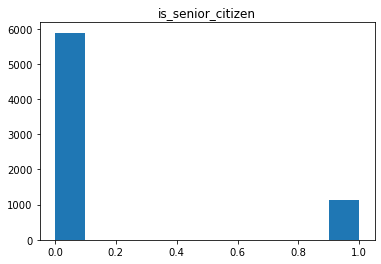

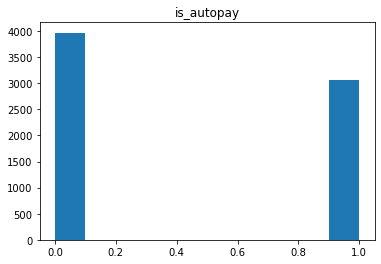

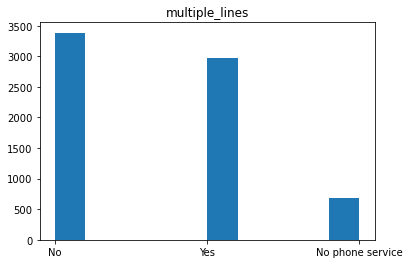

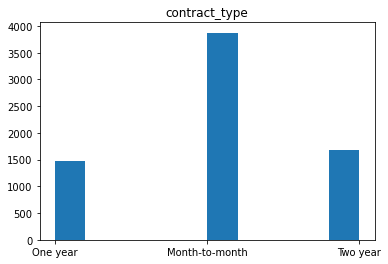

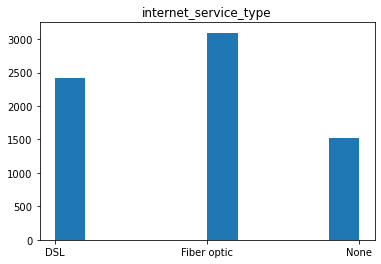

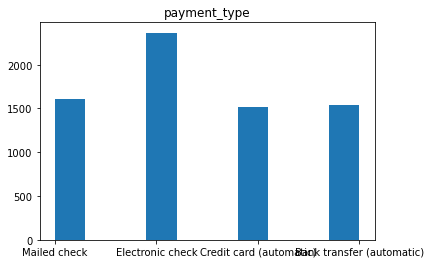

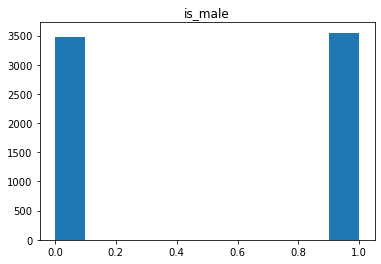

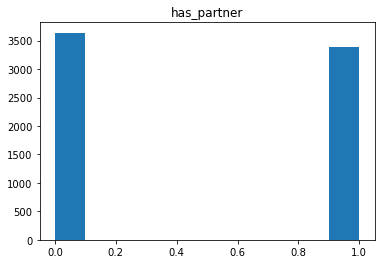

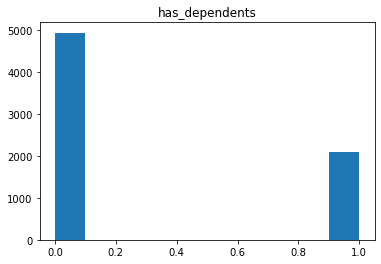

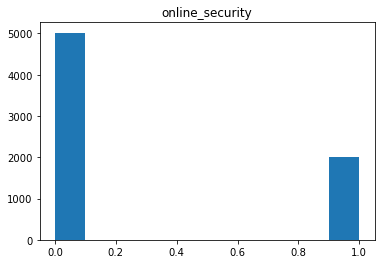

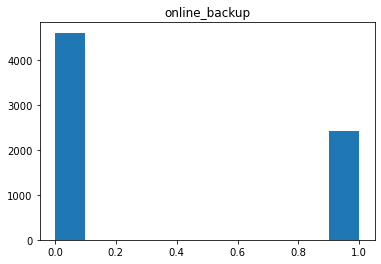

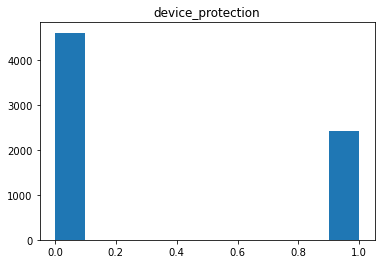

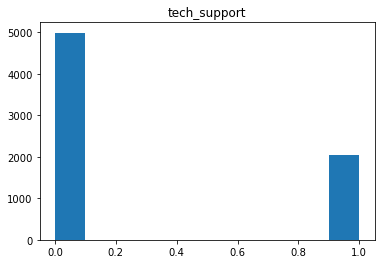

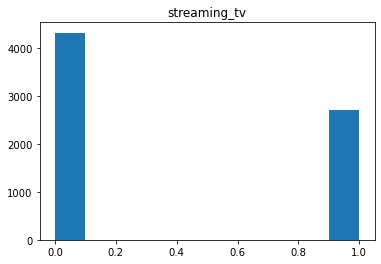

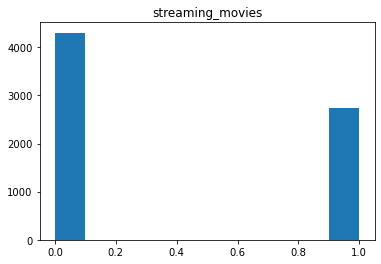

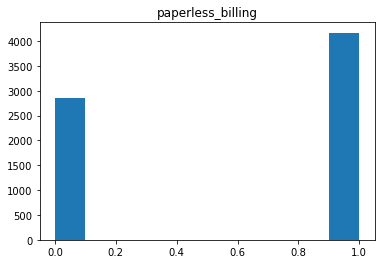

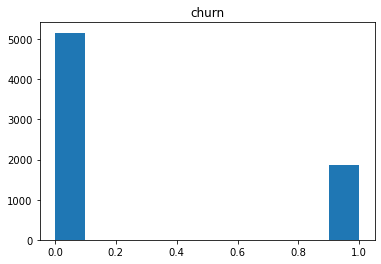

In [27]:
# create histogram for numerical columns to check out distribution
for col in num_cols: 
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [28]:
def split_data(df):
    '''
    This function takes in a dataframe and splits the data into train, validate and test samples. 
    Test, validate, and train are 20%, 24%, & 56% of the original dataset, respectively. 
    The function returns train, validate and test dataframes. 
    '''
    # split dataframe 80/20, stratify on churn to ensure equal proportions in both dataframes
    train_validate, test = train_test_split(df, test_size=.2, 
                                            random_state=123, 
                                            stratify=df.churn)
    # split previous larger dataframe by 70/30, stratify on churn
    train, validate = train_test_split(train_validate, test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.churn)
    # results in 3 dataframes
    return train, validate, test

In [29]:
train, validate, test = split_data(df)

In [30]:
train.shape, validate.shape, test.shape

((3937, 35), (1688, 35), (1407, 35))

# INITIAL QUESTIONS FOR DATA EXPLORATION

   ### - What is the rate of churn for monthly contracts compared to 1 year and 2 year contracts?
    
   ### - Is there a length of tenure before customers decide to churn?
    
   ### - Does service type play a key factor in the decision to churn?
    
   ### - What is the average charge amount for customers who churn?
    

In [31]:
train.head(3)

,customer_id,is_senior_citizen,tenure,multiple_lines,monthly_charges,total_charges,contract_type,internet_service_type,payment_type,is_male,has_partner,has_dependents,online_security,online_backup,phone_service,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,churn,one_line,no_phone_service,has_multiple_lines,month_to_month_contract,one_year_contract,two_year_contract,dsl_internet,fiber_optic_internet,no_internet_service,bank_transfer_autopay,credit_card_autopay,electronic_check_nonauto,mailed_check_nonauto,is_autopay
5919,8331-ZXFOE,0,58,Yes,71.10,4299.20,One year,DSL,Credit card (automatic),0,0,0,1,1,1,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1
1915,2790-XUYMV,0,71,Yes,85.45,6028.95,One year,Fiber optic,Credit card (automatic),1,0,1,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1
5054,7107-UBYKY,0,35,Yes,25.75,882.55,Month-to-month,None,Electronic check,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0


In [70]:
train.churn.mean()

0.2656845313690627

In [33]:
train.corr()['churn'].sort_values()

tenure                     -0.351807
two_year_contract          -0.300652
no_internet_service        -0.230842
is_autopay                 -0.199905
total_charges              -0.193774
one_year_contract          -0.181010
online_security            -0.180834
has_dependents             -0.163579
tech_support               -0.159305
has_partner                -0.143203
dsl_internet               -0.134693
credit_card_autopay        -0.127314
bank_transfer_autopay      -0.111275
mailed_check_nonauto       -0.090324
online_backup              -0.068519
device_protection          -0.060108
one_line                   -0.043127
no_phone_service           -0.015906
is_male                     0.000008
phone_service               0.015906
streaming_tv                0.038849
streaming_movies            0.051348
has_multiple_lines          0.053031
is_senior_citizen           0.159932
paperless_billing           0.190075
monthly_charges             0.196871
electronic_check_nonauto    0.292306
f

<AxesSubplot:>

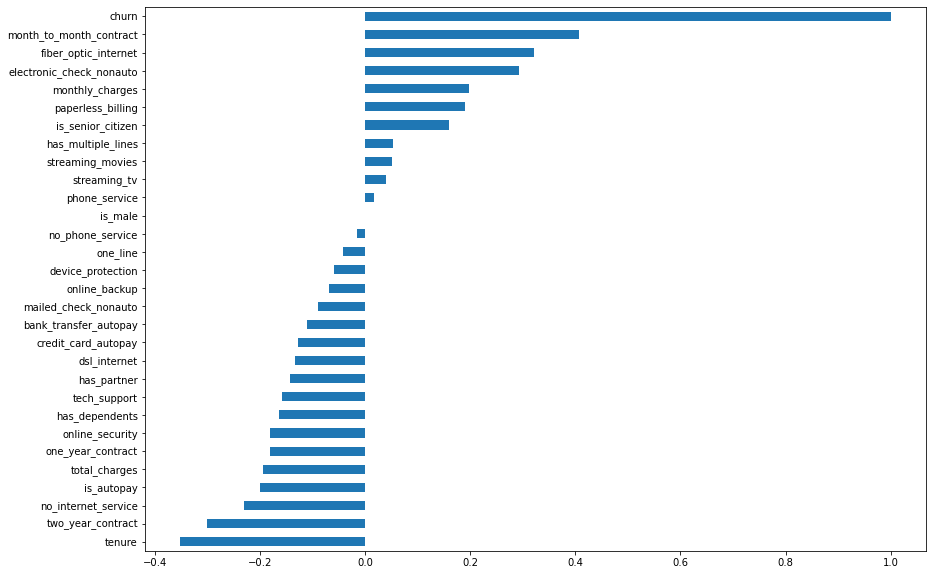

In [34]:
train.corr()['churn'].sort_values().plot(kind='barh', figsize=(14,10))

0    2891
1    1046
Name: churn, dtype: int64
----------
0    0.734315
1    0.265685
Name: churn, dtype: float64
----------
26.57% of customers churn overall


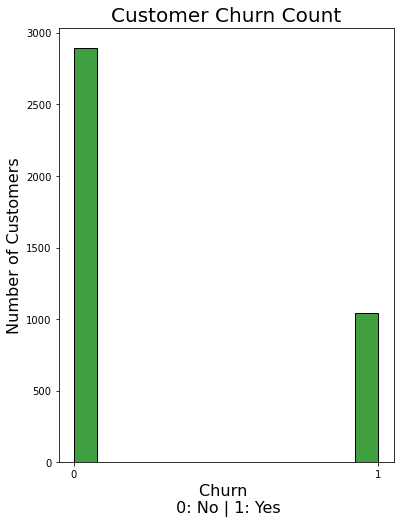

In [112]:
#  creating a visual for the churn rate of customers in the train data

plt.figure(figsize = (6, 8))
sns.histplot( x = 'churn', color = 'green', data = train)
plt.title('Customer Churn Count', fontsize = 20)
plt.xlabel('Churn \n 0: No | 1: Yes', fontsize = 16)
plt.xticks([0,1])
plt.ylabel('Number of Customers', fontsize = 16)

print(train.churn.value_counts())
print ('-' * 10)
print(train.churn.value_counts(normalize = True))
print('-' * 10)
print(f'{train.churn.mean() :.2%} of customers churn overall')

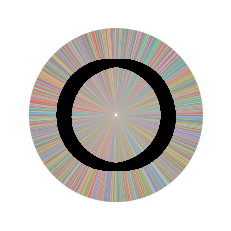

In [ ]:
plt.pie(data = train, x = 'churn', autopct='%.0f%%')
plt.show()

1    0.549911
0    0.450089
Name: month_to_month_contract, dtype: float64
0    0.79299
1    0.20701
Name: one_year_contract, dtype: float64


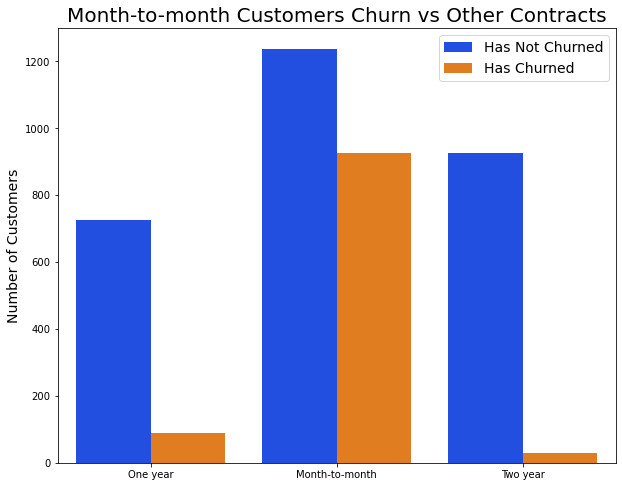

In [106]:
# Looking at the count of customers who have churn vs not churn within the different contract types (using the train data)

plt.figure(figsize = (10, 8))
sns.countplot(x='contract_type', hue = 'churn', palette ='bright', data = train)
plt.title('Month-to-month Customers Churn vs Other Contracts', fontsize = 20)
plt.legend(labels = ['Has Not Churned', 'Has Churned'], fontsize = 14)
plt.xlabel(' ')
plt.ylabel('Number of Customers', fontsize = 14)

print(train.month_to_month_contract.value_counts(normalize = True))
print(train.one_year_contract.value_counts(normalize = True))

It looks as if customers in the 'Month-to-month' contract have a churn rate that is almost 5X that of the other contract types.

## 2. Is there a length of tenure when customers are more likely to churn?

In [36]:
train.contract_type.value_counts()

Month-to-month    2165
Two year           957
One year           815
Name: contract_type, dtype: int64

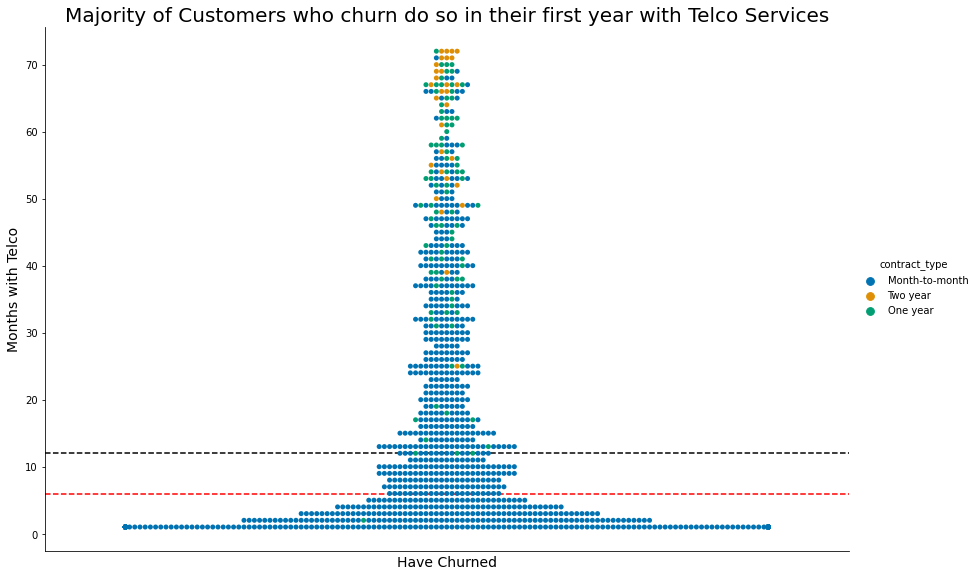

In [37]:
# take a look at the tenure of all contracts types and churn rates
sns.catplot( x= 'churn', y = 'tenure',
            kind = 'swarm', hue = 'contract_type',
            palette = 'colorblind', size = 8, aspect = 1.5,
            data = train[train.churn == 1])


plt.title('Majority of Customers who churn do so in their first year with Telco Services', fontsize = 20)
plt.xlabel('Have Churned', fontsize = 14)
plt.ylabel('Months with Telco', fontsize = 14)
plt.xticks([1], ['Has Churned'])
plt.axhline(y=12, linestyle = '--', color = 'black')
plt.axhline(y=6, linestyle = '--', color = 'red')

## Majority of churned customers will churn within the first 12 months, most customers don't make it to the 6 month mark.

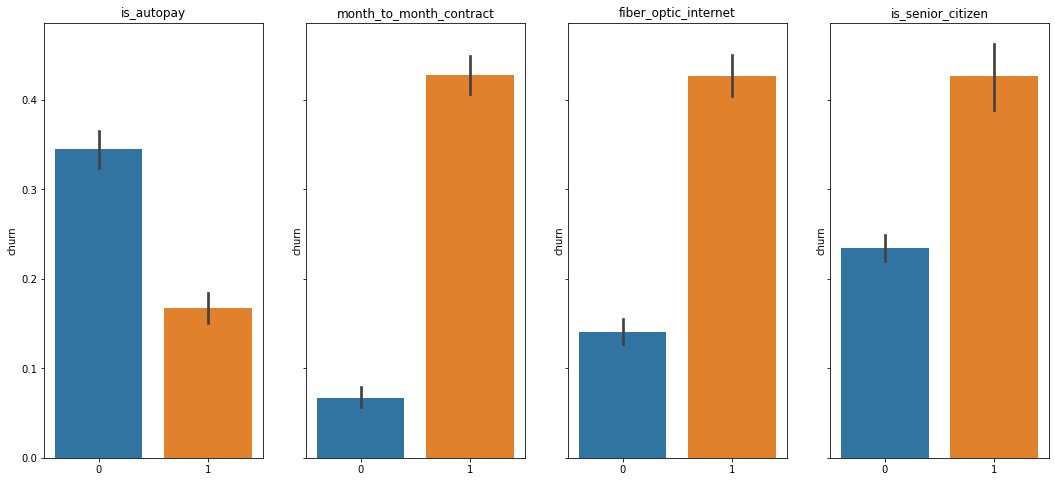

In [38]:
features = ['is_autopay', 'month_to_month_contract', 'fiber_optic_internet', 'is_senior_citizen']
# looking at churn mean for each column

_, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (18,8), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data = train, ax=ax[i])
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel('churn')
    ax[i].set_title(feature)
   
    

## Does the service type effect the churn rate

Text(0, 0.5, 'Number of Customers')

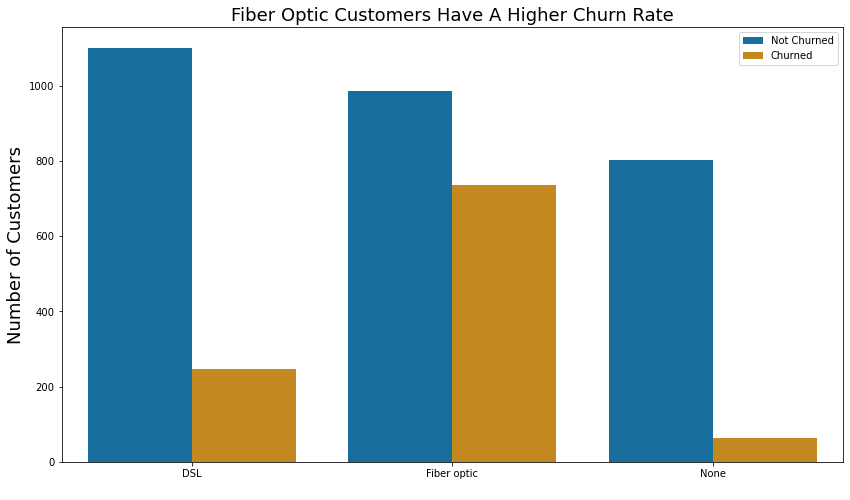

In [39]:
# plot visualization of number of customers churned/not churned by internet service type
plt.figure(figsize=(14,8))
sns.countplot(x='internet_service_type', hue='churn', palette='colorblind', data=train)
plt.title('Fiber Optic Customers Have A Higher Churn Rate', fontsize=18)
plt.legend(labels=['Not Churned','Churned'])
plt.xlabel(' ')
plt.ylabel('Number of Customers', fontsize =18)

# Do customers who churn pay more monthly than those who don't?

In [41]:
print(f' The average monthly charge for customers is: ${round(df.monthly_charges.mean(), 2)}')
df.monthly_charges.value_counts(bins = 5, normalize = True, sort = False)

 The average monthly charge for customers is: $64.8


(18.148999999999997, 38.35]    0.254693
(38.35, 58.45]                 0.142634
(58.45, 78.55]                 0.194113
(78.55, 98.65]                 0.259528
(98.65, 118.75]                0.149033
Name: monthly_charges, dtype: float64

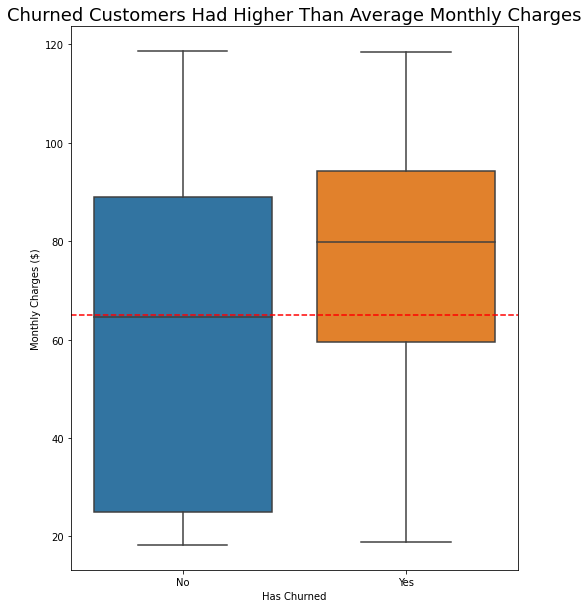

In [42]:
# plot visualization of distribution of monthly charges for those who have churned vs those who have not churned
plt.figure(figsize=(8,10))
sns.boxplot(x=train.churn, y=train.monthly_charges, data=train )
plt.title('Churned Customers Had Higher Than Average Monthly Charges', fontsize=18)
plt.xlabel('Has Churned')
plt.ylabel('Monthly Charges ($)')
plt.xticks([0, 1], ['No','Yes'])
plt.axhline(y = 65, linestyle = '--', color='red')

## Null Hypothesis: Customers who have churned have monthly charges equal to or less than customers who have not churned

## Alternate Hypothesis: Monthly charges for churned customers are higher than customers who have not churned

# ttest

In [43]:
# Independent groups. Churned vs not Churned and comparing monthly charges
alpha = .05
churn_sample = train[train.churn ==1].monthly_charges
overall_mean = train.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)
if p/2 > alpha:
    print('We fail to reject the null hypothesis')
elif t <0:
    print('We fail to reject the null hypothesis')
else:
    print('We reject the null hypothesis')

print(t, p/2, alpha)

We reject the null hypothesis
13.037366230308015 2.0798982128378347e-36 0.05


In [138]:
# 0 - Not churned - is the mode
train.churn.value_counts()

0    2891
1    1046
Name: churn, dtype: int64

In [139]:
baseline_accuracy = (train.churn == 0).mean()
print(f' Any new model must be more accurate than the Baseline Accuracy of {baseline_accuracy :.2%}')

 Any new model must be more accurate than the Baseline Accuracy of 73.43%


In [152]:
train.columns

Index(['customer_id', 'is_senior_citizen', 'tenure', 'multiple_lines',
       'monthly_charges', 'total_charges', 'contract_type',
       'internet_service_type', 'payment_type', 'is_male', 'has_partner',
       'has_dependents', 'online_security', 'online_backup', 'phone_service',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'churn', 'one_line', 'no_phone_service',
       'has_multiple_lines', 'month_to_month_contract', 'one_year_contract',
       'two_year_contract', 'dsl_internet', 'fiber_optic_internet',
       'no_internet_service', 'bank_transfer_autopay', 'credit_card_autopay',
       'electronic_check_nonauto', 'mailed_check_nonauto', 'is_autopay'],
      dtype='object')

In [186]:
# Create X and y version of train, y is a series of the target variable and X are all the features. 
drop_cols = ['churn', 'customer_id', 'multiple_lines', 'contract_type', 'internet_service_type', 'payment_type', 'streaming_tv', 
             'streaming_movies', 'mailed_check_nonauto', 'electronic_check_nonauto', 'credit_card_autopay', 'bank_transfer_autopay',
            'has_partner', 'has_dependents', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'no_phone_service', 
             'is_male', 'has_multiple_lines', 'one_line', 'is_senior_citizen', 'is_autopay']

X_train = train.drop(columns = drop_cols)
y_train = train.churn

X_validate = validate.drop(columns = drop_cols)
y_validate = validate.churn

X_test = test.drop(columns = drop_cols)
y_test = test.churn


In [187]:
X_train.shape, X_validate.shape, X_test.shape


((3937, 11), (1688, 11), (1407, 11))

In [188]:
# Evaluate Random Forest models on train & validate set by looping through different values for max_depth and min_samples_leaf hyperparameters

# create empty list for which to append metrics from each loop
scores = []
# set value for range
max_value = range(1,21)

# create loop for range 1-20
for i in max_value:
    # set depth & n_samples to value for current loop
    depth = i
    n_samples = i
    
    # define the model setting hyperparameters to values for current loop
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # fit the model on train
    forest = forest.fit(X_train, y_train)

    # use the model and evaluate performance on train
    in_sample_accuracy = forest.score(X_train, y_train)
    # use the model and evaluate performance on validate
    out_of_sample_accuracy = forest.score(X_validate, y_validate)
    
    # create output of current loop's hyperparameters and accuracy to append to metrics
    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    scores.append(output)

# convert metrics list to a dataframe for easy reading   
df = pd.DataFrame(scores)
# add column to assess the difference between train & validate accuracy
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,1,1,0.734315,0.734005,0.000311
1,2,2,0.774702,0.757701,0.017000
2,3,3,0.797308,0.776066,0.021241
3,4,4,0.801626,0.780806,0.020820
4,5,5,0.809754,0.779028,0.030725
5,6,6,0.812040,0.779028,0.033011
6,7,7,0.819914,0.781991,0.037923
7,8,8,0.827788,0.777844,0.049944
8,9,9,0.826772,0.781398,0.045374
9,10,10,0.832106,0.779028,0.053077


In [189]:
# Evaluate Random Forest model on train & validate set

# define the model setting hyperparameters to values for current loop
forest = RandomForestClassifier(max_depth=9, min_samples_leaf=9, random_state=123)

# fit the model on train
forest = forest.fit(X_train, y_train)

# use the model and evaluate performance on train
train_accuracy = forest.score(X_train, y_train)
# use the model and evaluate performance on validate
validate_accuracy = forest.score(X_validate, y_validate)

print(f'train_accuracy: {train_accuracy}')
print(f'validate_accuracy: {validate_accuracy}')

train_accuracy: 0.8267716535433071
validate_accuracy: 0.7813981042654028


In [190]:
# Evaluate KNearest Neighbors models on train & validate set by looping through different values for k hyperparameter

# create empty list for which to append scores from each loop
scores = []
k_range = range (1,20)
# create loop for range 1-20
for k in k_range:
            
    # define the model setting hyperparameters to values for current loop
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the model on train
    knn.fit(X_train, y_train)
    
    # use the model and evaluate performance on train
    train_accuracy = knn.score(X_train, y_train)
    # use the model and evaluate performance on validate
    validate_accuracy = knn.score(X_validate, y_validate)
    
    # create output of current loop's hyperparameters and accuracy to append to metrics
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    scores.append(output)

# convert scores list to a dataframe for easy reading
df = pd.DataFrame(scores)
# add column to assess the difference between train & validate accuracy
df['difference'] = df.train_accuracy - df.validate_accuracy
df


,k,train_accuracy,validate_accuracy,difference
0,1,0.991364,0.702014,0.289350
1,2,0.865126,0.748223,0.116903
2,3,0.861062,0.742891,0.118171
3,4,0.833376,0.765403,0.067973
4,5,0.831852,0.754739,0.077112
5,6,0.820422,0.767773,0.052649
6,7,0.818898,0.767180,0.051718
7,8,0.813056,0.780213,0.032842
8,9,0.815088,0.777844,0.037244
9,10,0.809246,0.772512,0.036734


8 KNN is themost accurate for train and validate

In [191]:
# Evaluate Logistic Regression models on train & validate set by looping through different values for c hyperparameter

# create empty list for which to append metrics from each loop
metrics = []

# create loop for values in list
for c in [.001, .005, .01, .05, .1, .5, 1, 5, 10, 50, 100, 500, 1000]:
            
    # define the model setting hyperparameters to values for current loop
    logit = LogisticRegression(C=c)
    
    # fit the model on train
    logit.fit(X_train, y_train)
    
    # use the model and evaluate performance on train
    train_accuracy = logit.score(X_train, y_train)
    # use the model and evaluate performance on validate
    validate_accuracy = logit.score(X_validate, y_validate)
    
    # create output of current loop's hyperparameters and accuracy to append to metrics
    output = {
        'C': c,
        'train_accuracy': train_accuracy,
        'validate_accuracy': validate_accuracy
    }
    
    metrics.append(output)

# convert metrics list to a dataframe for easy reading
df = pd.DataFrame(metrics)
# add column to assess the difference between train & validate accuracy
df['difference'] = df.train_accuracy - df.validate_accuracy
df

,C,train_accuracy,validate_accuracy,difference
0,0.001,0.789434,0.776659,0.012775
1,0.005,0.800610,0.790284,0.010325
2,0.010,0.793752,0.779028,0.014723
3,0.050,0.800102,0.786137,0.013964
4,0.100,0.799086,0.788507,0.010578
5,0.500,0.799340,0.784953,0.014387
6,1.000,0.799848,0.784953,0.014895
7,5.000,0.799848,0.784953,0.014895
8,10.000,0.799848,0.783768,0.016080
9,50.000,0.798832,0.783768,0.015064


## The random forest models proved to be the most accurate for this dataset although larger values of c for logistic regression produced similar results.

### The random forest model selected for use on the test dataset has max_depth and min_samples_leaf set to 10. This was chosen for its high accuracy and reduced likelihood of overfitting.

In [54]:
# define the model selected for test dataset
forest_test_model = RandomForestClassifier(max_depth=10, min_samples_leaf=10, random_state=123)
# use the model and evaluate performance on test
print(f'Test accuracy = {forest.score(X_test, y_test)}')

Test accuracy = 0.8017057569296375


In [55]:
y_pred = forest.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [56]:
y_pred_proba = forest.predict_proba(X_test)[:,1]
y_pred_proba

array([0.00506805, 0.02192801, 0.57685891, ..., 0.17455186, 0.11953972,
       0.23989817])

In [57]:
customer_ids = test.customer_id
customer_ids.shape

(1407,)

In [58]:
print(type(customer_ids))
print(type(y_pred))
print(type(y_pred_proba))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [59]:
predictions = pd.DataFrame(columns=['customer_id', 'churn_probability', 'churn_prediction'])
# set customer id using the customer_id column from the original database
predictions['customer_id'] = test.customer_id
# set the churn_probability column using the probabilities created above
predictions['churn_probability'] = y_pred_proba
# set the predictions column using the predictions created above
predictions['churn_prediction'] = y_pred

predictions.churn_prediction.value_counts()

0    1098
1     309
Name: churn_prediction, dtype: int64